# GARCH 模型

金融时间序列常常表现出不同于宏观时间序列的特征，如波动的丛聚性和分布的＂尖峰厚尾＂特征。传统的时间序列模型（假设干扰项的方差不随时间改变）往往无法捕捉这些特征。 Engle（1982）提出的 ARCH（auto－ regressive conditional heteroskedasticity）能够较好地描述金融资产价格波动的特征，在过去的二十年里得到了广泛的应用。在实际应用中，为了达到更好的拟合效果，常常需要设定较多的滞后项来描述波动的持续性，这往往会因为参数数目过多而降低估计的有效性。

针对这个问题，Bollerslev （1986）提出了广义 ARCH 模型，即 $\operatorname{GARCH}(\mathrm{p}, \mathrm{q})$ 模型。在随后的研究中，学者们根据金融时间序列的特征，又进一步提出了 ARCH－M（Engle et al．， 1987），EGARCH（Nelson，1991），Threshold ARCH（TARCH，Zakoian， 1990），Power ARCH（PARCH，Higgins and Bear，1992），Asymmetric power ARCH（A－PARCH，Ding，Granger and Engle，1993），多元 GARCH （Multivariable GARCH，Engle and Kroner，1995）等模型。

## ARCH 与 GARCH

### 条件期望与非条件期望

Engle (1982) 提出的 ARCH 模型的基本特点是允许干扰项的**条件方差**随时间改变，而其**非条件方差**则不随时间改变。

此前我们曾提到，若一个时间序列的均值、方差或协方差是随时间改变的，那么它就是**非平稳的**。然而，这并不意味着条件方差随时间改变的时间序列就是非平稳的。

需要注意的是，在此前定义“非平稳过程”时，我们强调的是序列的“长期”或“非条件”均值或方差。因此，只要一个序列的非条件方差是不随时间改变的，即使其条件方差随时间改变，它仍然是平稳的。

因此，在学习 ARCH 模型过程中，我们需要**区分条件期望与非条件期望**，这会进一步影响序列的概率分布。在使用最大似然估计（MLE）估计计量模型时，我们往往假设序列的**条件分布**为正态分布。然而，序列的**非条件分布**往往不同于其条件分布。

在 ARCH 模型中，若假设其条件分布为正态的，那么其非条件分布往往是非正态的，通常具有“厚尾”（*fat-tails*）特征。

由于大家对自回归（AR）过程已经比较熟悉，我们可以从 AR(1) 入手来解释 ARCH 模型的设定思想。考虑如下 AR(1) 模型：

$$
y_t = \rho y_{t-1} + u_t
$$

其中，$t = 1, 2, \cdots, T$，$u_t \sim \text{IID}(0, \sigma^2)$，并假设 $|\rho| < 1$。显然，$y_t$ 是一个平稳过程，其**非条件期望**与**方差**分别为：

$$
E(y_t) = 0,\quad Var(y_t) = \frac{\sigma^2}{1 - \rho^2}
$$

若记第 $t-1$ 期的信息集合为 $\Omega_{t-1}$，则 $y_t$ 的**条件期望**为：

$$
E(y_t \mid \Omega_{t-1}) = \rho y_{t-1}
$$

其**条件方差**为：

$$
Var(y_t \mid \Omega_{t-1}) = E(u_t^2 \mid \Omega_{t-1}) = \sigma^2
$$

可见，$y_t$ 的条件期望是随时间变化的，而非条件期望则不随时间变化。


有些情况下，我们不仅需要预测时间序列的**水平趋势**，同时也要预测其**波动情况**。下图展示了上证综指的时序图，在某些时段其波动很小，而在另一些时段波动却非常剧烈。

![](https://fig-lianxh.oss-cn-shenzhen.aliyuncs.com/20250512175414.png)

这种波动的变化，即**方差的变化**，对研究金融市场的微观机制具有非常重要的意义。因为投资者在持有风险较高的资产时，往往希望获得更高的回报率作为补偿。


### ARCH 模型
虽然在上面的例子中，$u_t$ 的非条件方差是不随时间改变的，但对于多数金融时间序列而言，其条件方差往往是随时间改变的。我们可以采用如下 $\operatorname{AR}(p)$ 过程来描述这种特征：

$$
u_t^2=\alpha_0+\alpha_1 u_{t-1}^2+\alpha_2 u_{t-2}^2+\cdots+\alpha_p u_{t-p}^2+v_t
$$


其中，$v_t \sim \operatorname{IID} N\left(0, \sigma^2\right)$ 。由此可知，$u_t^2$ 的条件期望为：

$$
\mathrm{E}\left(u_t^2\right)=\alpha_0+\alpha_1 u_{t-1}^2+\alpha_2 u_{t-2}^2+\cdots+\alpha_p u_{t-p}^2
$$


满足（11－2）式的白噪声序列 $u_t$ 称为 $p$ 阶＂自回归条件异方差＂（AutoRe－ gression Conditional Heteroskedastic）过程，通常表示为 $u_t \sim A R C H(p)$ 。

下面我们以最简单的 $\operatorname{ARCH}(1)$ 过程来说明，采用文献中惯用的方式可将 $\operatorname{ARCH}(1)$ 过程表示为：

$$
\begin{aligned}
y_t & =\mathbf{x}_t^{\prime} \beta+u_t \\
u_t & =v_t \sqrt{h_t} \\
h_t & =a_0+a_1 u_{t-1}^2
\end{aligned}
$$


其中，$v_t \sim \operatorname{IID} N(0,1), a_0>0$ 且 $a_1<1$ 。则 $u_t$ 的非条件期望和方差分别为：${ }^1$

$$
\begin{aligned}
\mathrm{E}\left(u_t\right) & =0 \\
\operatorname{Var}\left(u_t\right) & =\frac{a_0}{1-a_1}
\end{aligned}
$$


我们注意到，模型（11－3a）－（11－3c）完全满足传统线性回归模型的基本假设条件，因此，OLS 估计仍然是 $\beta$ 的所有线性无偏估计中最有效的估计量 （BLUE）。

然而，由于模型具有 ARCH 效应，所以还存在更为有效的非线性估计量。 $u_t$ 的条件期望和方差分别为：

$$
\begin{aligned}
\mathrm{E}\left(u_t \mid \Omega_{t-1}\right) & =0 \\
\operatorname{Var}\left(u_t \mid \Omega_{t-1}\right) & =\mathrm{E}\left(u_t^2 \mid \Omega_{t-1}\right) \\
& =a_0+a_1 u_{t-1}^2
\end{aligned}
$$


据此，我们可以进一步得到 $y_t$ 的条件期望和条件方差：

$$
\begin{aligned}
\mathrm{E}\left(y_t \mid \Omega_{t-1}\right) & =\mathbf{x}_t^{\prime} \beta \\
\operatorname{Var}\left(y_t \mid \Omega_{t-1}\right) & =a_0+a_1 u_{t-1}^2
\end{aligned}
$$


因此，$y_t$ 的条件方差同样是 $u_{t-1}^2$ 的函数。换言之，ARCH 会直接影响干扰项 $u_t$ ，而被解释变量 $y_t$ 虽然是由线性模型产生，但由于其干扰项中包含了 ARCH 效应，所以 $y_t$ 本身也是一个 ARCH 过程。

### $\operatorname{ARCH}(p)$ 模型及其扩展

前面已经提到，金融时间序列的波动往往具有＂从聚性＂，因此将上面介绍的 $\operatorname{ARCH}(1)$ 模型扩展至 $\operatorname{ARCH}(\mathrm{p})$ 模型往往能够更好的描述这种波动特征。ARCH（p）模型可表示为：

$$
\begin{aligned}
u_t & =v_t \sqrt{h_t} \quad v_t \sim \operatorname{IID} N(0,1) \\
h_t & =a_0+a_1 u_{t-1}^2+a_2 u_{t-2}^2+\cdots+a_p u_{t-p}^2
\end{aligned}
$$

基于（14－1）的设定，我们可以把 $\operatorname{ARCH}(p)$ 模型扩展为 $\operatorname{AR}(m)-\operatorname{ARCH}(p)$ 模型：

$$
\begin{aligned}
y_t & =\delta+\sum_{j=1}^m \rho_j y_{t-j}+u_t \\
u_t & =v_t \sqrt{h_t} \quad v_t \sim \operatorname{IID} N(0,1) \\
h_t & =a_0+\sum_{j=1}^p a_j u_{t-j}^2
\end{aligned}
$$


显然，按照这一思路，我们同样可以建立 ARMA $(m, n)-\mathrm{ARCH}(p)$ 。
基于（14－3a）的设定，我们尚可把 $\operatorname{ARCH}(p)$ 模型扩展为多元回归模型：

$$
\begin{aligned}
y_t & =\beta_0+\sum_{j=1}^k \beta_j x_{i t}+u_t \\
u_t & =v_t \sqrt{h_t} \quad v_t \sim \operatorname{IID} N(0,1) \\
h_t & =a_0+\sum_{j=1}^p a_j u_{t-j}^2
\end{aligned}
$$


这里，$x_{i t}$ 为外生变量或被解释变量的滞后项。在金融时间序列分析中，如果研究的对象是资产价格，我们往往还会在模型设定中加入虚拟变量，以捕捉＂周内川历效应＂（day－of－the－week）。


例如，在分析股票价格的 1 资料时，我们便可以在（14－5a）的基础上作如下设定：

$$
y_t=\sum_{j=1}^k \beta_j x_{i t}+\sum_{l=1}^5 a_l D_{l t}+u_t
$$


其中，$l=1$（周一）， 2 （周二）， 3 （周三）， 4 （周四）， 5 （周五），$D_{l t}$ 为 $0 / 1$ 虚拟变量。

### ARCH 效应的检验

在模型设定之前，我们需要检验是否存在 ARCH 或 GARCH 效应。前面已经提到，由于模型（14－3a）－（14－3b）的 OLS 估计是无偏且一致的，所以我们可以利用 OLS 估计的残差来检验 ARCH 效应是否存在。基本步骤如下：

- 第一步 采用 OLS 估计模型 $y_t=\mathbf{x}_t^{\prime} \boldsymbol{\beta}+u_t$ ，得到残差 $\hat{u}_t$ ，以及 $\hat{u}_t^2$ ；
- 第二步 估计模型 $\hat{u}_t^2=a_0+a_1 \hat{u}_{t-1}^2+\cdots+a_p \hat{u}_{t-p}^2$ ，得到 $R^2$ ；

- 第三步 构造统计量：$L M=T \cdot R^2 \sim \chi^2(p)$ 。

该检验山 Engle（1982）提出，基本思想在于，若不存在 ARCH 效应，则 $\hat{a}_1, \hat{a}_2, \cdot, \hat{a}_p$ 应当不会显著异于零。因此，我们可以针对原假设 $\mathrm{H}_0: a_1=a_2=\cdots=a_p=0$ 进行检验，并基于 LM原则构造统计量。

### 模型的评估
若我们设定的 ARCH 模型是正确的，那么标准化后的残差：

$$
z_t=\frac{u_t}{\sqrt{h_t}}
$$


应当为一 i．i．d 的随机序列。因此，我们可以通过分析序列 $\left\{z_t\right\}$ 来评估模型的设定是否合理。具体而言，若均值方程设定无误，则 $z_t$ 不应表现出显著的序列相关，这可以采用 Ljung－Box 统计量进行检验。我们可以采用同样的方法分析 $z_t^2$ 以评判方差方程的设定情况。最后，通过分析 $z_t$的偏度、峰度以及分位－分位图（即，Q－Q 图），我们可以大体判定模型的分布假设是否合理。

## GARCH 模型
GARCH 模型是对 ARCH 模型的扩展，允许条件方差不仅与过去的干扰项有关，还与过去的条件方差有关。GARCH 模型的基本形式为：
$$
\begin{aligned}
u_t & =v_t \sqrt{h_t} \quad v_t \sim \operatorname{IID} N(0,1) \\ 
h_t & =a_0+\sum_{j=1}^p a_j u_{t-j}^2+\sum_{j=1}^q b_j h_{t-j}
\end{aligned}
$$
其中，$a_0>0$，$a_j \geq 0$，$b_j \geq 0$。显然，GARCH 模型的条件方差不仅与过去的干扰项有关，还与过去的条件方差有关。GARCH 模型的一个重要特征是其非条件方差是有限的，即：
$$
Var(u_t) = \frac{a_0}{1 - \sum_{j=1}^p a_j - \sum_{j=1}^q b_j}
$$
其中，$\sum_{j=1}^p a_j + \sum_{j=1}^q b_j < 1$。这意味着 GARCH 模型可以捕捉到金融时间序列的波动性聚集现象。

GARCH 模型的一个重要应用是用于金融市场的风险管理。通过对 GARCH 模型的估计，我们可以得到未来的波动率预测，从而为投资者提供风险管理的依据。此外，GARCH 模型还可以用于资产定价、投资组合优化等领域。

GARCH 模型的估计通常采用最大似然估计（MLE）方法。由于 GARCH 模型的非线性特征，MLE 方法的计算相对复杂，通常需要使用数值优化算法来求解。

在实际应用中，GARCH 模型的参数估计和模型选择通常使用信息准则（如 AIC、BIC）来进行。信息准则可以帮助我们在不同的 GARCH 模型中选择最优模型，以便更好地拟合数据。
GARCH 模型的一个重要扩展是 EGARCH 模型（Exponential GARCH），它允许条件方差的对数为线性函数。EGARCH 模型可以更好地捕捉到金融时间序列中的非对称效应和杠杆效应。
EGARCH 模型的基本形式为：
$$
\begin{aligned}
\log(h_t) & =a_0+\sum_{j=1}^p a_j \left(\frac{u_{t-j}}{\sqrt{h_{t-j}}}\right)^2+\sum_{j=1}^q b_j \log(h_{t-j})
\end{aligned}
$$
其中，$a_0$ 是常数项，$a_j$ 和 $b_j$ 是模型参数。EGARCH 模型的一个重要特征是其条件方差的对数是线性函数，这使得 EGARCH 模型能够捕捉到金融时间序列中的非对称效应和杠杆效应。

## 模拟 GARCH 效应

在下图中，我们模拟产生了三个时间序列，数据产生过程如下：

$$
\begin{aligned}
y_t & =0.9 y_{t-1}+u_t \\
u_t & =v_t \sqrt{1+a_1 u_{t-1}^2} \quad v_t \sim \operatorname{IID} N(0,1)
\end{aligned}
$$


其中，（a）－（c）图分别对应 $a_1=0, a_1=0.3$ 和 $a_1=0.5$ 。可见，$a_1$ 值越大波动的自相关性（波动的持续性）越强。这一特征在 $y_t^2$ 序列中表现得更加显著。

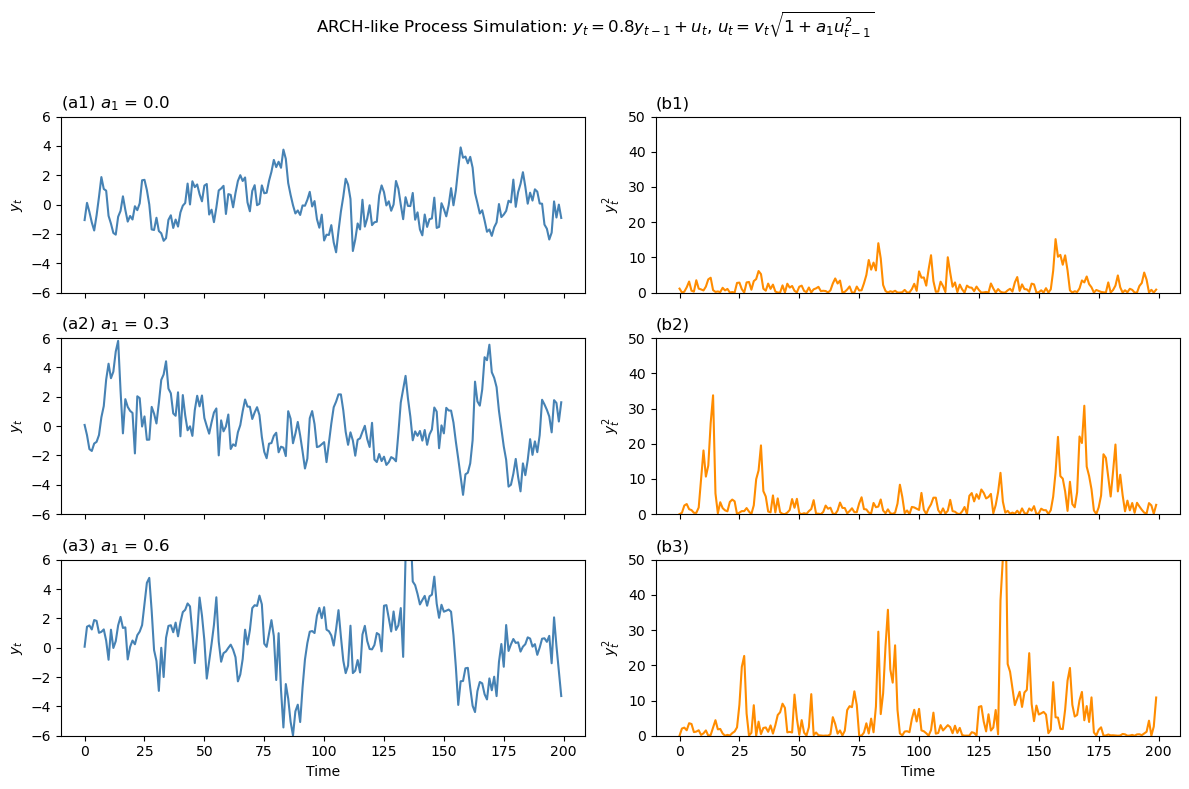

In [27]:
import numpy as np
import matplotlib.pyplot as plt

# 设置随机种子以保证可重复性
np.random.seed(405)

# 参数设置
T = 200             # 时间序列长度
rho = 0.8           # y_t 的自回归系数
a1_values = [0.0, 0.3, 0.6]  # 三个不同的 a1 值

# 初始化三个序列
y1 = np.zeros(T)
y2 = np.zeros(T)
y3 = np.zeros(T)

# 准备绘图
fig, axes = plt.subplots(3, 2, figsize=(12, 8), sharex=True)
fig.suptitle(r"ARCH-like Process Simulation: $y_t = 0.8 y_{t-1} + u_t$, $u_t = v_t \sqrt{1 + a_1 u_{t-1}^2}$", fontsize=12)

# 遍历每个 a1 取值，进行模拟与绘图
for i, a1 in enumerate(a1_values):
    y = np.zeros(T)
    u = np.zeros(T)
    v = np.random.normal(0, 1, T)

    # 初始化前两个值
    y[0] = v[0]
    u[0] = v[0]

    # 生成序列
    for t in range(1, T):
        u[t] = v[t] * np.sqrt(1 + a1 * u[t-1]**2)
        y[t] = rho * y[t-1] + u[t]

    # 将生成的序列赋值给对应的变量
    if i == 0:
        y1 = y
    elif i == 1:
        y2 = y
    elif i == 2:
        y3 = y

    # 绘制 y_t 图像
    axes[i, 0].plot(y, color='steelblue')
    axes[i, 0].set_ylabel(r"$y_t$", fontsize=10)
    axes[i, 0].set_ylim(-6, 6)
    axes[i, 0].set_title(f"(a{i+1}) $a_1$ = {a1}", loc='left')

    # 绘制 y_t^2 图像
    axes[i, 1].plot(y**2, color='darkorange')
    axes[i, 1].set_ylabel(r"$y_t^2$", fontsize=10)
    axes[i, 1].set_ylim(0, 50)
    axes[i, 1].set_title(f"(b{i+1})", loc='left')

# 美化图形
axes[-1, 0].set_xlabel("Time")
axes[-1, 1].set_xlabel("Time")
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()


<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\s'
<>:25: SyntaxWarning: invalid escape sequence '\m'
<>:25: SyntaxWarning: invalid escape sequence '\s'
C:\Users\Administrator\AppData\Local\Temp\ipykernel_26588\3673749718.py:25: SyntaxWarning: invalid escape sequence '\m'
  axes[i].plot(x, p, 'r', linewidth=2, label=f"Normal Curve\n$\mu={mu:.2f}$, $\sigma={std:.2f}$")
C:\Users\Administrator\AppData\Local\Temp\ipykernel_26588\3673749718.py:25: SyntaxWarning: invalid escape sequence '\s'
  axes[i].plot(x, p, 'r', linewidth=2, label=f"Normal Curve\n$\mu={mu:.2f}$, $\sigma={std:.2f}$")


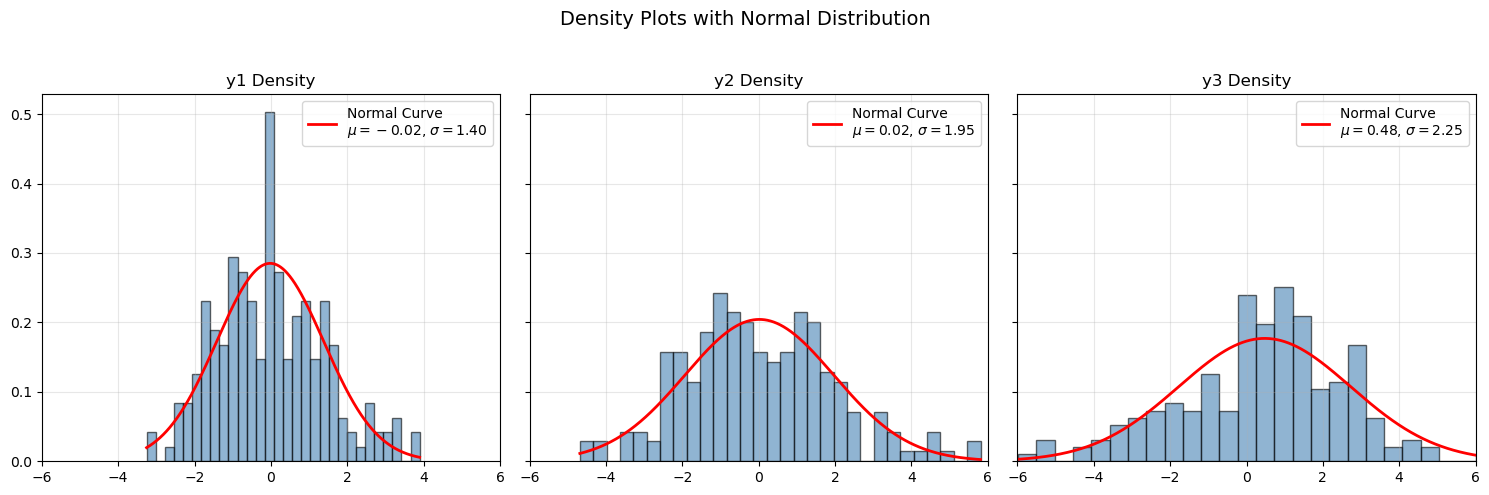

In [25]:
import numpy as np
from scipy.stats import norm

import matplotlib.pyplot as plt

# 准备绘图
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharey=True)
fig.suptitle("Density Plots with Normal Distribution", fontsize=14)

# 数据列表
data_list = [y1, y2, y3]
titles = ["y1 Density", "y2 Density", "y3 Density"]

# 遍历每个数据集
for i, (data, title) in enumerate(zip(data_list, titles)):
    # 计算密度
    density, bins, _ = axes[i].hist(data, bins=30, density=True, alpha=0.6, color='steelblue', edgecolor='black')
    
    # 计算正态分布曲线
    mu, std = np.mean(data), np.std(data)
    x = np.linspace(min(data), max(data), 1000)
    p = norm.pdf(x, mu, std)
    
    # 绘制正态分布曲线
    axes[i].plot(x, p, 'r', linewidth=2, label=f"Normal Curve\n$\mu={mu:.2f}$, $\sigma={std:.2f}$")
    axes[i].set_title(title, fontsize=12)
    axes[i].set_xlim(-6, +6)
    axes[i].legend(fontsize=10)
    axes[i].grid(alpha=0.3)

# 美化图形
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.show()

### 尖峰厚尾特征

可以看出：
- 三个序列都具有尖峰厚尾特征；
- 然而，随着 $\alpha_1$ 的取值不断变大，序列的偏度和峰度也在不断增大；这说明，随着 $\alpha_1$ 的增大，序列的尖峰厚尾特征也在不断增强。

### 估计 ARCH 和 GARCH 模型

我们先使用上述模拟数据估计 ARCH (P) 模型。由于数据是模拟产生的，因此我们可以直接使用 OLS 估计模型：
$$
y_t=\beta_0+\beta_1 y_{t-1}+u_t
$$
然后，利用 OLS 估计的残差 $\hat{u}_t$ 来检验 ARCH 效应是否存在。我们可以使用 LM 检验来检验 ARCH 效应是否存在。LM 检验的原假设为：不存在 ARCH 效应。
LM 检验的统计量为：
$$
LM=T \cdot R^2 \sim \chi^2(p)
$$
其中，$R^2$ 为 OLS 估计的残差平方和的决定系数，$T$ 为样本容量，$p$ 为滞后阶数。LM 检验的结果如下：



In [23]:
import pandas as pd
from arch import arch_model

# 定义函数：估计 ARCH(p) 和 GARCH(1,1) 模型
def estimate_models(data, p=1):
    # 确保输入是 pandas Series 且为零均值
    if not isinstance(data, pd.Series):
        data = pd.Series(data)
    data = data - data.mean()

    print(f"\nEstimating models for data with length {len(data)}")

    # ARCH(p) 模型估计
    try:
        arch_model_instance = arch_model(data, mean="Zero", vol="ARCH", p=p)
        arch_fitted = arch_model_instance.fit(disp="off")
        print(f"\nARCH({p}) Model Summary:")
        print(arch_fitted.summary())
    except Exception as e:
        print(f"ARCH({p}) model failed: {e}")
        arch_fitted = None

    # GARCH(1,1) 模型估计
    try:
        garch_model_instance = arch_model(data, mean="Zero", vol="GARCH", p=1, q=1)
        garch_fitted = garch_model_instance.fit(disp="off")
        print("\nGARCH(1,1) Model Summary:")
        print(garch_fitted.summary())
    except Exception as e:
        print(f"GARCH(1,1) model failed: {e}")
        garch_fitted = None

    return arch_fitted, garch_fitted

# 示例使用（假设 y1, y2, y3 是已定义的 pandas Series）
if __name__ == "__main__":
    p = 1  # ARCH(p) 模型的阶数

    print("=== Results for y1 ===")
    arch_y1, garch_y1 = estimate_models(y1, p)

    print("\n=== Results for y2 ===")
    arch_y2, garch_y2 = estimate_models(y2, p)

    print("\n=== Results for y3 ===")
    arch_y3, garch_y3 = estimate_models(y3, p)


=== Results for y1 ===

Estimating models for data with length 300

ARCH(1) Model Summary:
                        Zero Mean - ARCH Model Results                        
Dep. Variable:                   None   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.003
Vol Model:                       ARCH   Log-Likelihood:               -597.875
Distribution:                  Normal   AIC:                           1199.75
Method:            Maximum Likelihood   BIC:                           1207.16
                                        No. Observations:                  300
Date:                Mon, May 12 2025   Df Residuals:                      300
Time:                        18:38:01   Df Model:                            0
                            Volatility Model                            
                 coef    std err          t      P>|t|  95.0% Conf. Int.
----------------------------------------------------

## 实例：比亚迪汽车

In [12]:
import pandas as pd
import akshare as ak

# 获取比亚迪（002594）股票的前复权日线行情数据
byd_stock_data = ak.stock_zh_a_hist(
    symbol="002594",      # 股票代码
    period="daily",       # 日频率
    start_date="20021128",# 起始日期（比亚迪上市时间）
    adjust="qfq"          # 复权类型：前复权
)

# 删除不需要的列（如果存在）
cols_to_drop = ["开盘", "收盘", "最高", "最低", "换手率"]
byd_stock_data = byd_stock_data.drop(columns=[col for col in cols_to_drop if col in byd_stock_data.columns])

# 将“日期”列转换为 datetime 类型
byd_stock_data["日期"] = pd.to_datetime(byd_stock_data["日期"])

# 可选：将日期设置为索引
byd_stock_data.set_index("日期", inplace=True)

# 查看前几行数据
print(byd_stock_data.head())


              股票代码     成交量           成交额     振幅    涨跌幅   涨跌额
日期                                                          
2011-06-30  002594  562925  1.349342e+09  33.49  59.55  7.45
2011-07-01  002594  335613  8.986792e+08  15.03  12.78  2.55
2011-07-04  002594  219646  6.535179e+08   9.86  12.44  2.80
2011-07-05  002594  381081  1.257046e+09   7.86   8.89  2.25
2011-07-06  002594  312967  1.056614e+09  12.48   1.27  0.35


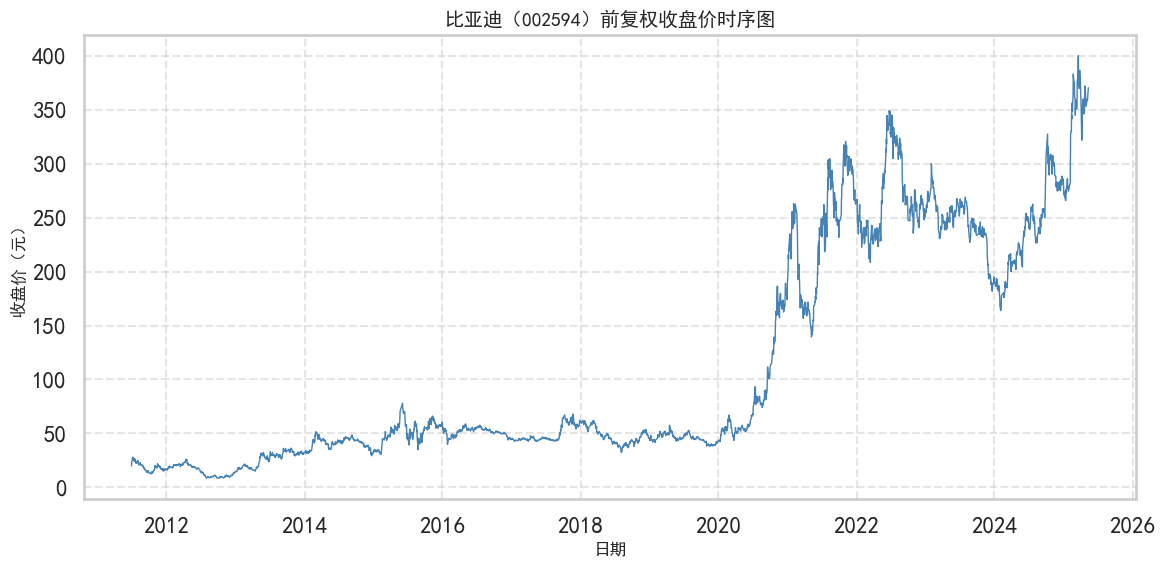

In [14]:
# 收盘价时序图

import pandas as pd
import akshare as ak
import matplotlib.pyplot as plt
from matplotlib import rcParams

# 添加中文支持
rcParams['font.sans-serif'] = ['SimHei']  # 设置字体为黑体
rcParams['axes.unicode_minus'] = False   # 解决负号显示问题

# 获取比亚迪（002594）股票的前复权日线行情数据
byd_stock_data = ak.stock_zh_a_hist(
    symbol="002594",
    period="daily",
    start_date="20021128",
    adjust="qfq"
)

# 保留日期和收盘价列，并转换日期为 datetime 类型
byd_stock_data["日期"] = pd.to_datetime(byd_stock_data["日期"])
byd_stock_data.set_index("日期", inplace=True)

# 绘图：收盘价时序图
plt.figure(figsize=(12, 6))
plt.plot(byd_stock_data["收盘"], color='steelblue', linewidth=1)
plt.title("比亚迪（002594）前复权收盘价时序图", fontsize=14)
plt.xlabel("日期", fontsize=12)
plt.ylabel("收盘价（元）", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


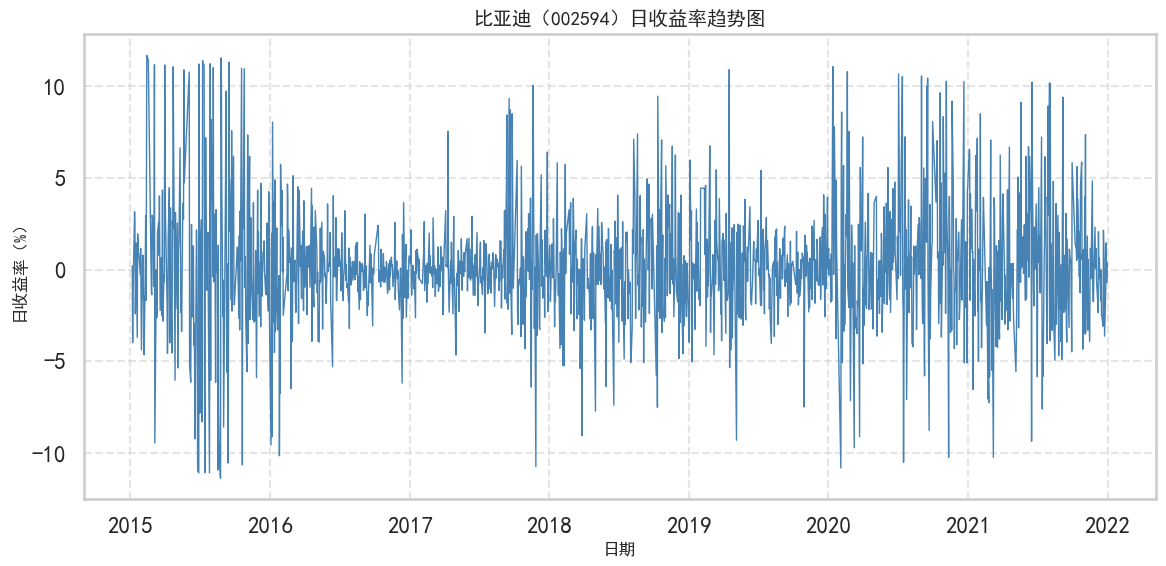

In [15]:
# 设置时间范围
start_date = "2015-01-01"
end_date = "2021-12-31"

# 筛选指定时间范围内的数据
byd_stock_data_filtered = byd_stock_data.loc[start_date:end_date]

# 计算日收益率
byd_stock_data_filtered['日收益率'] = byd_stock_data_filtered['收盘'].pct_change() * 100

# 绘制收益率趋势图
plt.figure(figsize=(12, 6))
plt.plot(byd_stock_data_filtered.index, byd_stock_data_filtered['日收益率'], color='steelblue', linewidth=1)
plt.title("比亚迪（002594）日收益率趋势图", fontsize=14)
plt.xlabel("日期", fontsize=12)
plt.ylabel("日收益率（%）", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

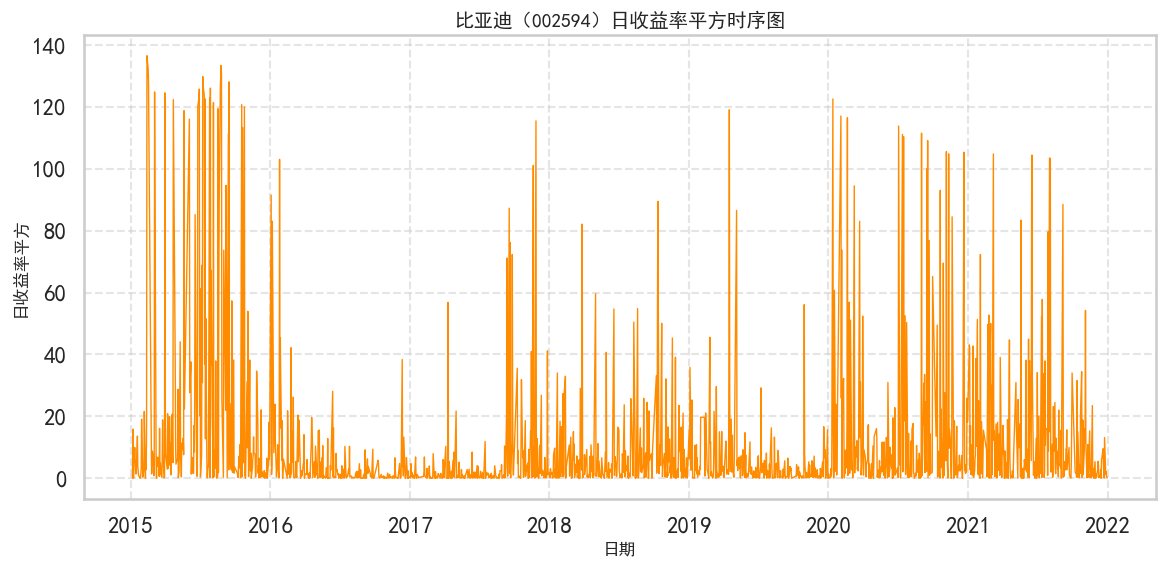

In [16]:
# 绘制日收益率平方的时序图
plt.figure(figsize=(12, 6))
plt.plot(byd_stock_data_filtered.index, byd_stock_data_filtered['日收益率']**2, color='darkorange', linewidth=1)
plt.title("比亚迪（002594）日收益率平方时序图", fontsize=14)
plt.xlabel("日期", fontsize=12)
plt.ylabel("日收益率平方", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

### 后续

- 估计 GARCH 模型
- 检验 GARCH 效应
- 模型评估
- 预测波动率